# Response To Question 10

Our team has decided to respond to Question 10 from the Nolan book. This question is repeated here for clarity:

> We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the runners across all 14 years of the races. Use quan- tile–quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change?


## Background

The Cherry Blossom 10 mile run has been a popular marathon for people in the Washington DC area. Data is available for the runners for since 1999. This data includes the runners' age, name, home, and their run time all broken down by year. Through this study, we look at data taken from these runners between 1999 and 2012. 

### Methods

We will use several methods to visualize if there is in fact a changing average age between the years. A few methods we will use includes:
 - Box Plots
 - Scatter Plots
 - QQ Plots
 - Density Charts
 - Line Charts

### Results

The box plots for age seems to definitely change over the years. Interestingly we see a few outliers for the mean as time increasees whereas the data seems to become increasingly more uniform as time increases.

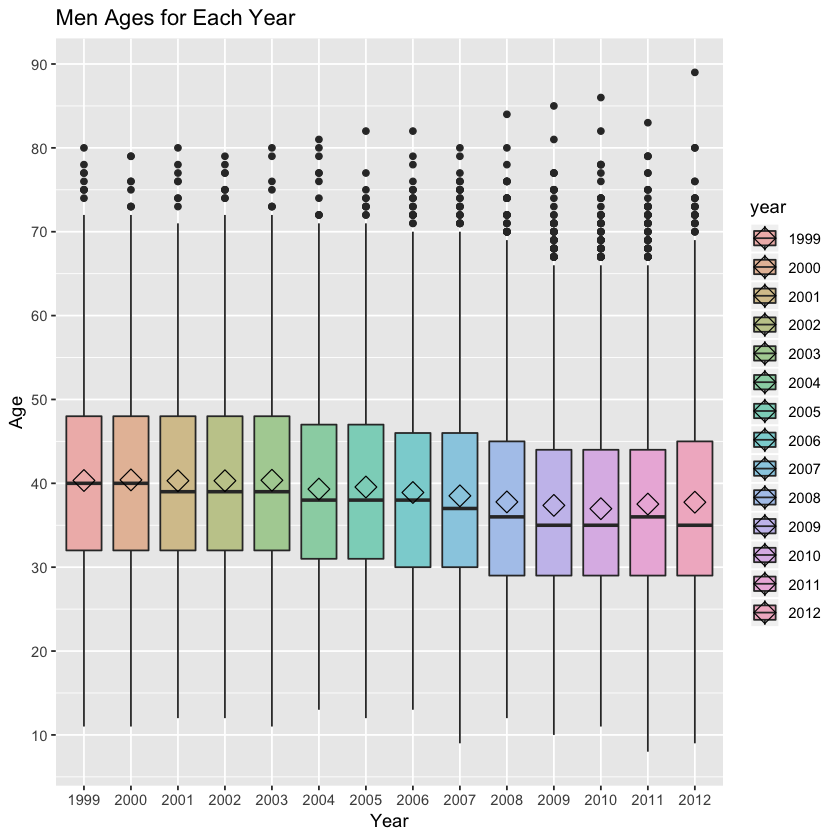

In [14]:
boxPlotsAgesAnnualMen()

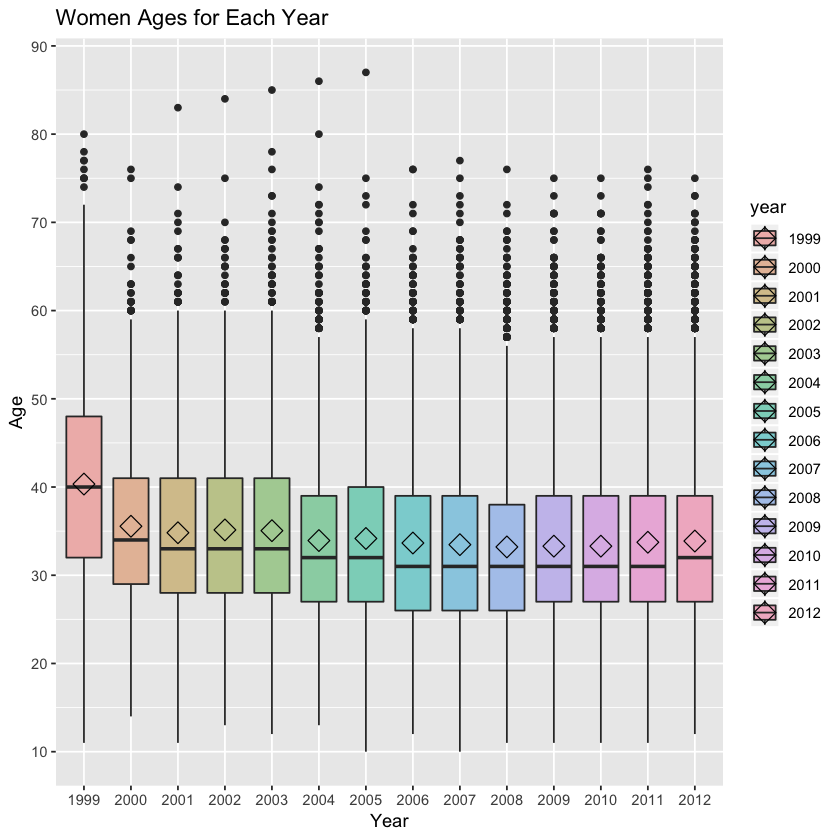

In [15]:
boxPlotsAgesAnnualWomen()

It is really difficult to tell if there is any notable correlation between age and runtime. However, we do see that the fastest times (less than 50 minutes) seem to happen between the ages of 20-35.

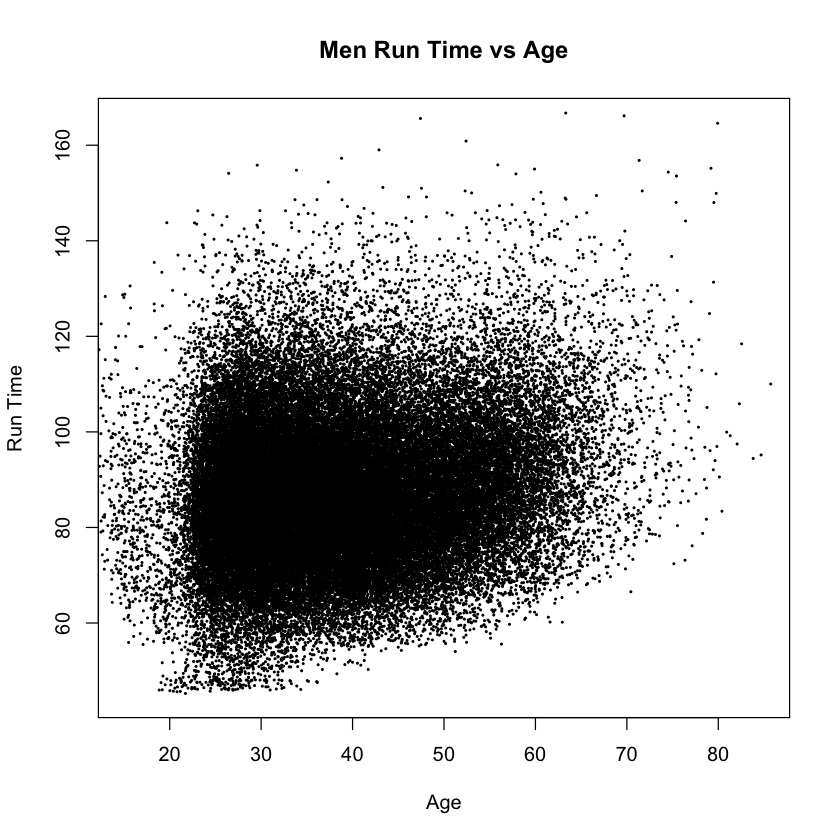

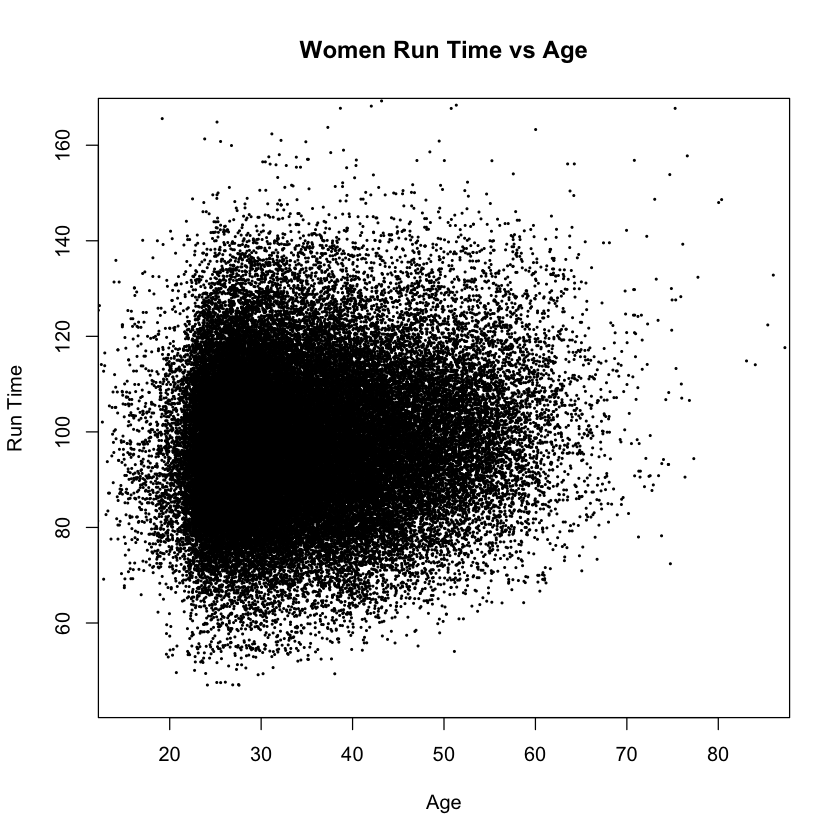

In [16]:
# Show the age and run time. for men first, then women
plot(runTime ~ jitter(age, amount = 0.5), data = MenData, pch = 19,cex = 0.2, ylim = c(45, 165), xlim = c(15, 85), xlab = "Age", ylab = "Run Time")
title(main = "Men Run Time vs Age")

plot(runTime ~ jitter(age, amount = 0.5), data = WomenData, pch = 19,cex = 0.2, ylim = c(45, 165), xlim = c(15, 85), xlab = "Age", ylab = "Run Time")
title(main = "Women Run Time vs Age")


We can see a gradual decrease of run time over the years when looking into the box plots.

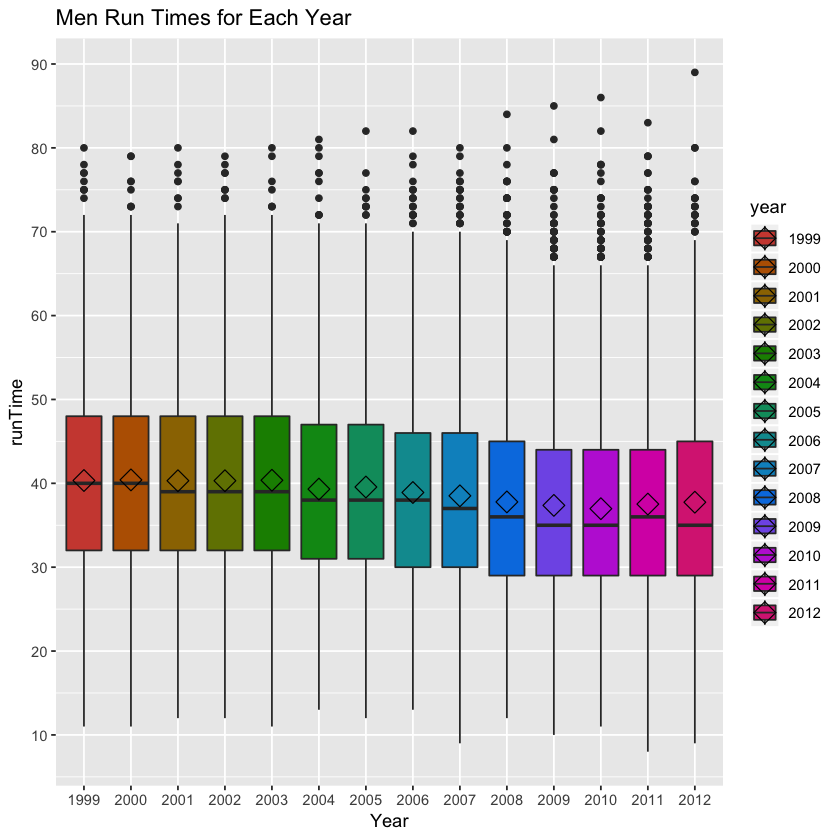

In [17]:
boxPlotsRunTimeAnnualMen()


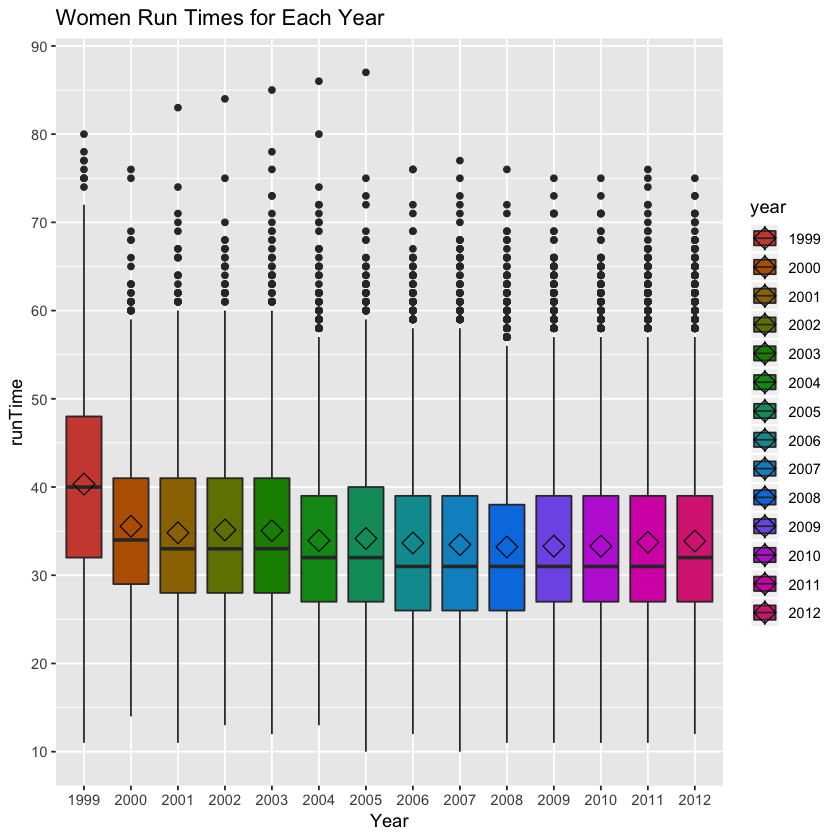

In [18]:
boxPlotsRunTimeAnnualWomen()

According to QQplots, age seems to be much more uniform for men then for women, when comparing data from 1999 and 2012.

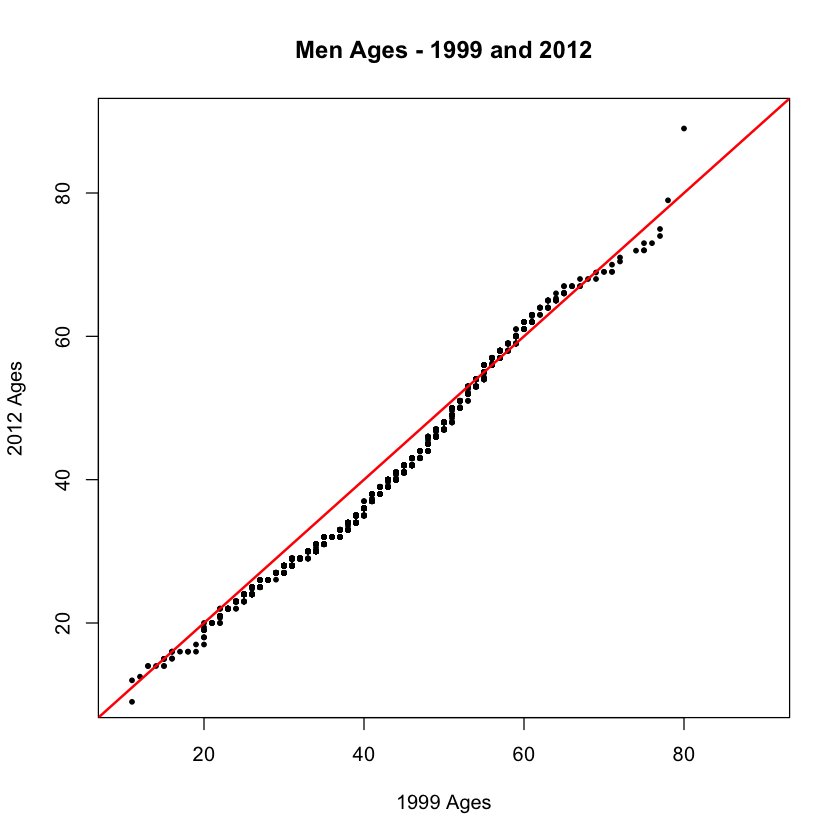

In [19]:
qqplotsMen()

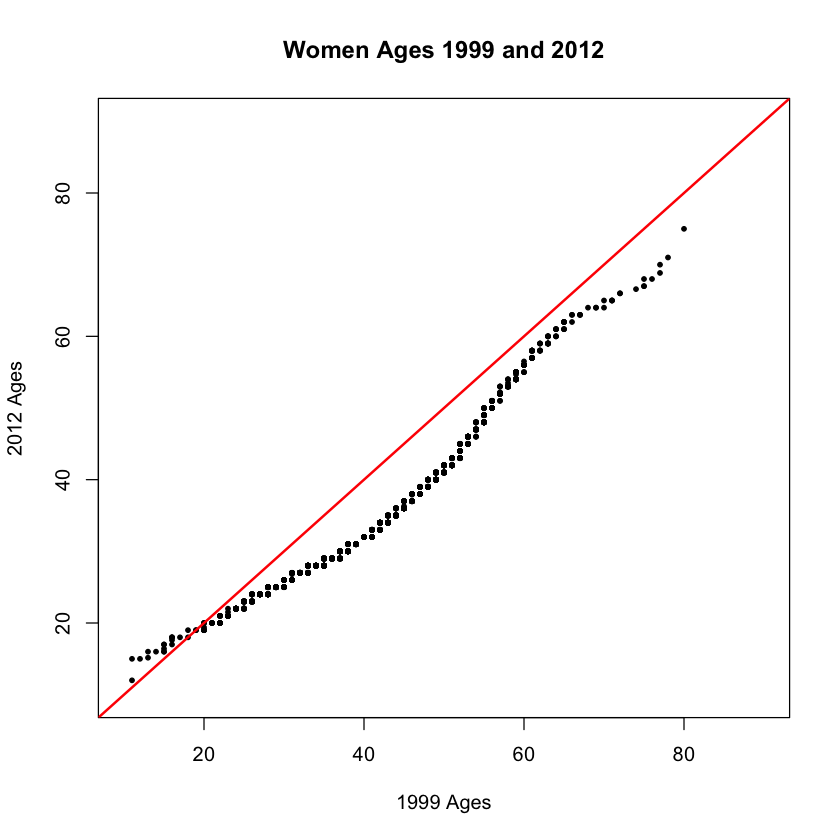

In [20]:
qqPlotsWomen()

# Density Curves

Density curves really help us visualize a marked change in the statistical distribution over the years. Especially for the women where the most dense portion contains nearly 60% of the data in 2012 (compared to around 37% in 1999).

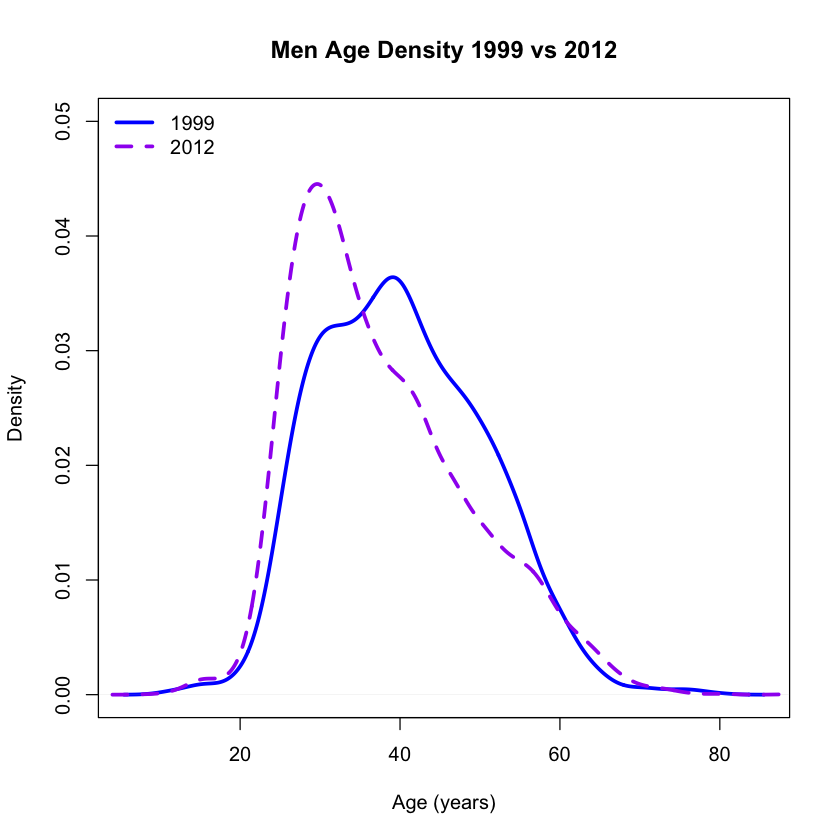

In [21]:
densityMen()

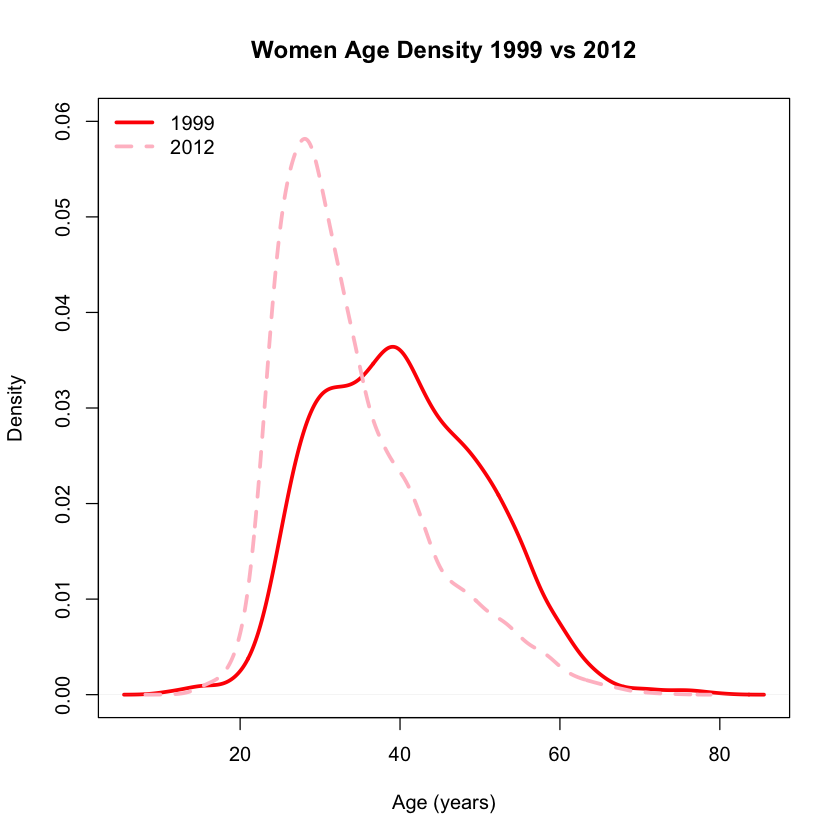

In [22]:
densityWomen()

Finally, a simple line chart can really help us see that the average age of runners is definitely on the incline (although the last two years as shown an increase in average age).

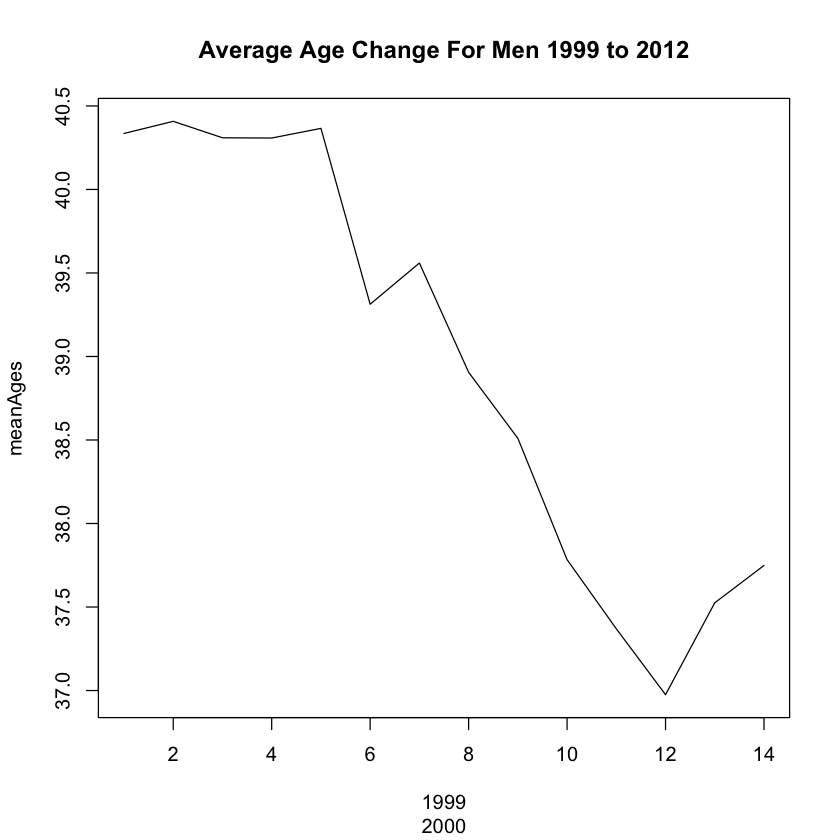

In [37]:
lineChartMen()

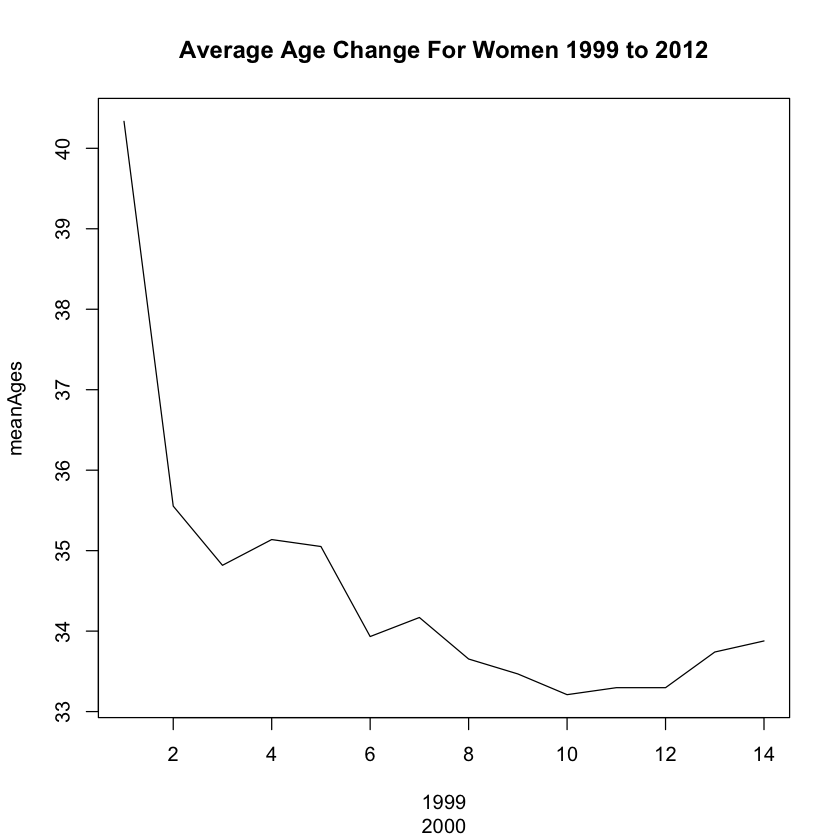

In [24]:
lineChartWomen()

# Conclusion

We can conclude that the overall distribution of ages changes most for women, where the concentration most to the younger group. This move to a younger group of runners is most noticible for women between 1999 and 2000 where the average age goes from around 40 to around 35 (respectively).

We also see that the average age of runners is on a notabile decline, especially among women. We may possibly be seeing a return of an older generation, however, as the average has slightly increased in 2011 and 2012.

# Code

In [25]:
library(ggplot2)

In [26]:
WOMEN_DATASOURCE = './cbWomen.rda'
MEN_DATASOURCE = './cbmen.rda'

## Load Data

In [27]:
load(WOMEN_DATASOURCE)
load(MEN_DATASOURCE)

In [28]:
menWomenRaw = rbind(cbmen, cbWomen)

# Remove invalid ages

In [29]:
# Take out values where the age is missing, or less than 6 years old.
MenData = cbmen[!is.na(cbmen$age) & cbmen$age >= 6, ]
WomenData = cbWomen[!is.na(cbWomen$age) & cbWomen$age >= 6, ]
# There were 70,070 observations for men and 77,336 for women
nrow(cbmen)
nrow(cbWomen)
# We removed 28 male observations and 17 female
nrow(cbmen) - nrow(MenData)
nrow(cbWomen) - nrow(WomenData)

[1] 70070

[1] 77336

[1] 28

[1] 17

In [30]:
MenPlots <- MenData
MenPlots$year <- as.character(MenPlots$year)

WomenPlots <- WomenData
WomenPlots$year <- as.character(WomenPlots$year)

MenWomenCombined = rbind(MenPlots, WomenPlots)


In [31]:
Men99 = MenData[ MenData$year == 1999, "age" ]
Men12 = MenData[ MenData$year == 2012, "age" ]

Women99 = WomenData[ WomenData$year == 1999, "age" ]
Women12 = WomenData[ WomenData$year == 2012, "age" ]



## Visualizations

### Box Plots

In [32]:
# Box plots first
# Visualize the age of the runners by year: first men, then women
boxPlotsAgesAnnualMen = function() {
    ggplot(MenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
        scale_y_continuous(breaks = pretty(MenPlots$age, n = 10)) + 
        ggtitle("Men Ages for Each Year") + xlab('Year') + ylab('Age') +
        stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
        scale_fill_hue(l=80, c=35)

}

boxPlotsAgesAnnualWomen = function() {
    ggplot(WomenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
        scale_y_continuous(breaks = pretty(WomenPlots$age, n = 10)) + 
        ggtitle("Women Ages for Each Year") + xlab('Year') + ylab('Age') +
        stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
        scale_fill_hue(l=80, c=35)
}

In [33]:

# Visualize the RUN TIME of the runners by year: first men, then women as above
boxPlotsRunTimeAnnualMen = function() {
    ggplot(MenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
        scale_y_continuous(breaks = pretty(MenPlots$age, n = 10)) + 
        ggtitle("Men Run Times for Each Year") + xlab('Year') + ylab('runTime') +
        stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
        scale_fill_hue(l=50, c=105)
}


boxPlotsRunTimeAnnualWomen = function() {
    ggplot(WomenPlots, aes(fill=year, x=year, y=age)) + geom_boxplot() + 
    scale_y_continuous(breaks = pretty(WomenPlots$age, n = 10)) + 
    ggtitle("Women Run Times for Each Year") + xlab('Year') + ylab('runTime') +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4) +
    scale_fill_hue(l=50, c=105)
}

### QQ Plots

In [34]:
qqplotsMen = function() {
    #Quantile Quantile plots.
    qqplot(Men99, Men12, pch = 19, cex = 0.5, 
           ylim = c(10,90), xlim = c(10,90), 
           xlab = "1999 Ages",
           ylab = "2012 Ages", 
           main = "Men Ages - 1999 and 2012")
    abline(a =0, b = 1, col="red", lwd = 2)
}

qqPlotsWomen = function() {
    qqplot(Women99, Women12, pch = 19, cex = 0.5, 
           ylim = c(10,90), xlim = c(10,90), 
           xlab = "1999 Ages",
           ylab = "2012 Ages", 
           main = "Women Ages 1999 and 2012")
    abline(a =0, b = 1, col="red", lwd = 2)
}


### Density Charts

In [35]:
# Density Plots - men then women
densityMen = function() {
    plot(density(Men99, na.rm = TRUE), 
         ylim = c(0, 0.05), col = "blue",
         lwd = 3,  xlab = "Age (years)",  main = "")
    title(main = "Men Age Density 1999 vs 2012")
    lines(density(Men12, na.rm = TRUE), 
          lwd = 3, lty = 2, col="purple")
    legend("topleft", col = c("blue", "purple"), lty= 1:2, lwd = 3,
           legend = c("1999", "2012"), bty = "n")
}

densityWomen = function() {
    plot(density(Women99, na.rm = TRUE), 
         ylim = c(0, 0.06), col = "red",
         lwd = 3,  xlab = "Age (years)",  main = "")
    title(main = "Women Age Density 1999 vs 2012")
    lines(density(Women12, na.rm = TRUE), 
          lwd = 3, lty = 2, col="pink")
    legend("topleft", col = c("red", "pink"), lty= 1:2, lwd = 3,
           legend = c("1999", "2012"), bty = "n")
}

### Line Chart

In [36]:
lineChartMen = function() {
    meanAges = tapply(MenPlots$age, MenPlots$year, mean)
    plot(meanAges, type='l', xlab=names(meanAges))
    title(main = "Average Age Change For Men 1999 to 2012")
}

lineChartWomen = function() {
    meanAges = tapply(WomenPlots$age, WomenPlots$year, mean)
    plot(meanAges, type='l', xlab=names(meanAges))
    title(main = "Average Age Change For Women 1999 to 2012")   
}

lineChartCombined = function() {
    meanAges = tapply(MenWomenCombined$age, MenWomenCombined$year, mean)
    plot(meanAges, type='l', xlab=names(meanAges))
    title(main = "Average Age Change For Men And Women 1999 to 2012")   
}
